In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/mbp/SOCR_Audio_Sonification/"


bin		 mixes		     songs		      subroutines.py
createTable.sql  NASA_SpaceApps2022  sonifications	      thinkdsp.py
images		 __pycache__	     sort_images.py	      var
insta485db	 read_exp_audio.py   spacetune_example.ipynb  WebbDemo.csv
main.py		 README.md	     spacetune_example.py
mdp		 requirements.txt    sql


In [ ]:
!pip install audiolazy
from subroutines import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
audio_filename='electric-feel' #should be G# major, 103bpm, 6/4
# audio_filename='sweet-home-alabama' #should be G major, 98bpm, 4/4

audio_format = '.mp3' #.wav or .mp3

audio_path = '/content/drive/My Drive/mbp/SOCR_Audio_Sonification/songs/' + audio_filename + audio_format


print(audio_path)

song = Song(audio_path) #loads song, finds key and tempo


/content/drive/My Drive/mbp/SOCR_Audio_Sonification/songs/electric-feel.mp3


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


likely key: G# major, correlation: 0.808
likely tempo:  103.359375 bpm


In [ ]:
start_octave = 3 #keep it kind of high to not clash as much
n_octaves = 3
    
freqs = get_scale_freqs(start_note=song.root + str(start_octave), octaves=n_octaves, scale=song.scale)


sonification duration:  37.15 seconds
song duration:  36.62 seconds


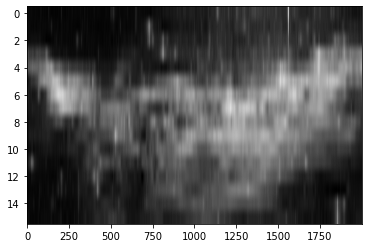

In [ ]:
image_index = 0 

# image_path = image_catalog.get_image_path(image_index) 
image_path = '/content/drive/My Drive/mbp/SOCR_Audio_Sonification/images/“Cosmic Cliffs” in the Carina Nebula.png'

beats_per_bar = 4 #assume 4/4, doesn't matter much
time_per_bar = beats_per_bar*60/song.tempo
n_bars = 16
sonif_duration = n_bars*time_per_bar #seconds, need to set with tempo, key signature and # of bars

print('sonification duration: ',round(sonif_duration,2),'seconds')
print('song duration: ',round(len(song.y)/song.sr,2),'seconds')

sonification = Sonification(image_path, song, freqs, sonif_duration) 
plt.imshow(sonification.pixels,aspect='auto',cmap='gray')

# sonification.save_sonification('./sonifications/' + image_catalog.get_image_name(image_index) + '.wav')
sonification.wave.make_audio()

(207.65234878997256, 1661.2187903197805)

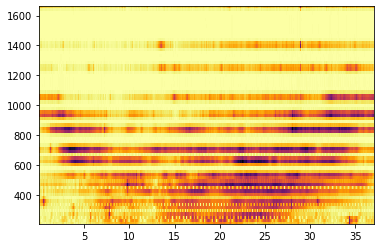

In [ ]:
spec = sonification.wave.make_spectrogram(seg_length=1000)
spec.plot()
plt.ylim(min(freqs),max(freqs))

In [ ]:

sonification.mix_audio(mix=0.6) #mix sonfication with audio,  mix is fraction of sonification

sonification.mix.make_audio()

(207.65234878997256, 1661.2187903197805)

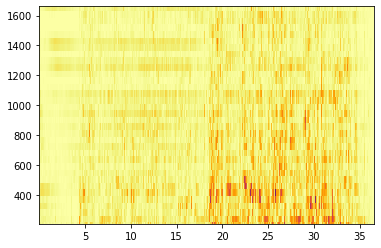

In [ ]:
spec = sonification.mix.make_spectrogram(seg_length=1000)
spec.plot()
plt.ylim(min(freqs),max(freqs))

In [ ]:
sonification.mix.write('/content/drive/My Drive/mbp/SOCR_Audio_Sonification/mixes/' + audio_filename + ' + ' +image_catalog.get_image_name(image_index) + '.wav')



Writing /content/drive/My Drive/mbp/SOCR_Audio_Sonification/mixes/electric-feel + “Cosmic Cliffs” in the Carina Nebula.wav
